In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

import project_types as pt
import codebase as cb
import pandas as pd
from IPython.display import Markdown

def pmark(s):
    display(Markdown(s))

pd.set_option('display.max_colwidth', -1)
plt.rcParams['figure.figsize'] = [8, 8]

In [5]:
from importlib import reload
reload(cb);
reload(pt);

# __Data preparation__

Ensure to have the following file structure </br>
image_analysis/models/ </br>
├── project_types.py </br>
├── ... </br>
├── codebase.py </br>
├── data/ </br>
&emsp;&emsp;├── all_data_info.csv (https://www.kaggle.com/c/painter-by-numbers/)</br>
&emsp;&emsp;├── train_1/ (keep consistency with project_types.py->pict_dset) </br>
&emsp;&emsp;├── arcDataset/ (https://www.kaggle.com/wwymak/architecture-dataset) </br>
&emsp;&emsp;&emsp;&emsp;├── Achaemenid architecture/ </br>
&emsp;&emsp;&emsp;&emsp;├── ... </br>
&emsp;&emsp;&emsp;&emsp;├── American Foursquare architecture/

In [6]:
# Load the dataframes
pict_df, arch_df = cb.load_data()

## art or building?

In [7]:
# Compute the art_or_building dataset
art_or_building = cb.get_art_or_building(pict_df, arch_df)

# Sample only some values by stratified sampling
art_or_building = cb.stratified_sample(art_or_building, col='art_class', frac=.01)
# Load images data
art_or_building = cb.load_imgs(art_or_building)

## art or building? Image check

Now we show some images to check if it is all ok

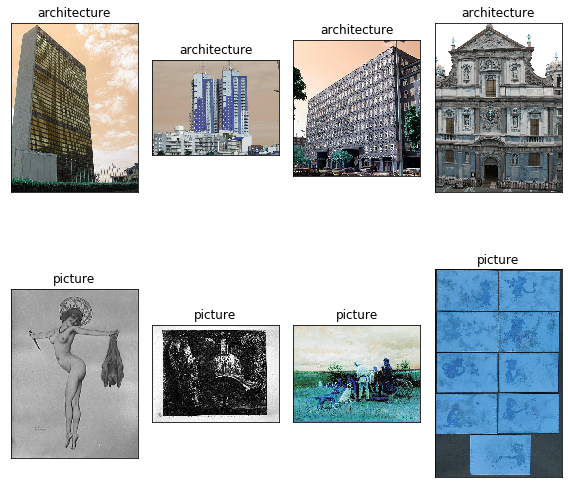

In [8]:
grid_cols = 4
fig = plt.figure()

arch_sample = art_or_building[art_or_building['art_class']=='architecture'].sample(grid_cols)
pic_sample = art_or_building[art_or_building['art_class']=='picture'].sample(grid_cols)

for idx in range(grid_cols*2):
    ax = fig.add_subplot(2,grid_cols,idx+1)
    plt.xticks([])
    plt.yticks([])
    if idx>=4:
        el = pic_sample.iloc[idx-4]
    else:
        el = arch_sample.iloc[idx]
    ax.set_title(el.art_class)
    
    plt.imshow(np.array(el.img).astype(int))

fig.tight_layout()

## whats style dataset

The whole dataset has 136 styles

In [9]:
# Compute the whats_style dataset
whats_style_pict = cb.get_whats_style(pict_df)
# Stratified sampling
whats_style_pict = cb.stratified_sample(whats_style_pict, col='style', frac=.01)

# Load images
whats_style_pict = cb.load_imgs(whats_style_pict)

## whats style dataset image check

Now we show some images to check if it is all ok

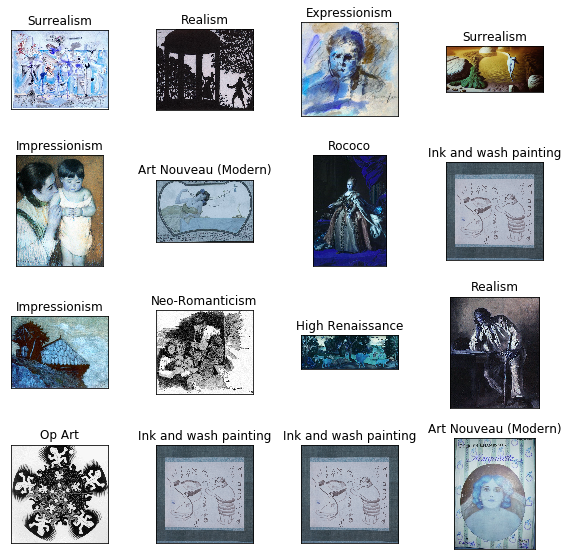

In [10]:
grid_cols = 4
grid_rows = 4 
fig = plt.figure()

for idx in range(grid_rows*grid_cols):
    ax = fig.add_subplot(grid_rows,grid_cols,idx+1)
    plt.xticks([])
    plt.yticks([])
    
    el = whats_style_pict.sample(1).iloc[0]
    ax.set_title(el.style)
    plt.imshow(np.array(el.img).astype(int))

fig.tight_layout()

## whats style architecture

In [11]:
# Compute the whats_style dataset
whats_style_arch = cb.get_whats_style(arch_df)
# Stratified sampling
whats_style_arch = cb.stratified_sample(whats_style_arch, col='style', frac=.01)

# Load images
whats_style_arch = cb.load_imgs(whats_style_arch)

## whats style architecture Data checking

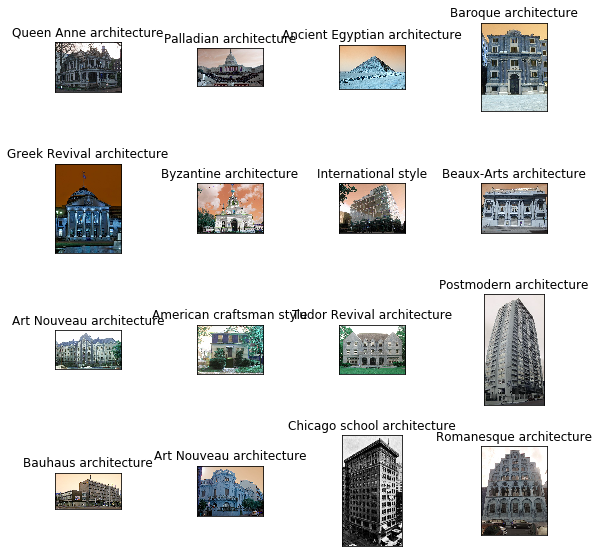

In [12]:
grid_cols = 4
grid_rows = 4 
fig = plt.figure()

for idx in range(grid_rows*grid_cols):
    ax = fig.add_subplot(grid_rows,grid_cols,idx+1)
    plt.xticks([])
    plt.yticks([])
    
    el = whats_style_arch.sample(1).iloc[0]
    ax.set_title(el.style)
    plt.imshow(np.array(el.img).astype(int))

fig.tight_layout()